# Analisis descriptivo multivariado

**Universidad Central**

*Nelson Alirio Cruz*

In [8]:
from pydoc import help 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Cereal

Vamos a cargar la base de datos de Cereal, que contiene información nutricional de diferentes cereales.

In [9]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Cereal.csv"
datos=pd.read_csv(url, sep=";", decimal=",", index_col=0)
datos.dtypes
datos.columns

Index(['Fabrica', 'Calorias', 'Proteina', 'Grasa', 'Sodio', 'Fibra',
       'Carbohidratos', 'Azucares', 'Potasio', 'Vitaminas'],
      dtype='object')

In [27]:
cuanti=datos[['Calorias', 'Proteina', 'Grasa', 'Sodio', 'Fibra',
       'Carbohidratos', 'Azucares', 'Potasio']]
cuanti.dtypes

Calorias         float64
Proteina         float64
Grasa            float64
Sodio            float64
Fibra            float64
Carbohidratos    float64
Azucares         float64
Potasio          float64
dtype: object

In [23]:
datos['Fibra']=-datos['Fibra']

# Matriz de covarianzas y de correlación

Cuando se tiene un conjunto de variables cuantitativas, por cada par de ellas se calcula la covarianza:
$Cov(X,Y)=\frac{1}{n-1}\sum_{i=1}^n (X_i-\bar{X})(Y_i-\bar{Y})$
Estos valores conformaran la matriz de covarianzas.
EL coeficiente de correlación lineal se define como:
$\rho_{XY}=\frac{Cov(X;Y)}{sd(X)sd(Y)}$


In [28]:
covarianza=cuanti.cov()
covarianza

,Calorias,Proteina,Grasa,Sodio,Fibra,Carbohidratos,Azucares,Potasio
Calorias,3895.242099,116.442850,60.674383,4310.041188,-148.608725,416.865952,180.380317,5362.723526
Proteina,116.442850,6.983432,1.790252,197.706130,-13.122839,12.243296,2.850421,401.040187
Grasa,60.674383,1.790252,2.713399,55.851817,-2.284043,2.550715,3.995474,96.005854
Sodio,4310.041188,197.706130,55.851817,17064.098428,-396.983157,468.557877,161.021552,13109.507474
Fibra,-148.608725,-13.122839,-2.284043,-396.983157,37.618644,-10.547819,-5.329678,-1065.826587
Carbohidratos,416.865952,12.243296,2.550715,468.557877,-10.547819,71.714955,-2.017438,369.551907
Azucares,180.380317,2.850421,3.995474,161.021552,-5.329678,-2.017438,34.050018,285.976158
Potasio,5362.723526,401.040187,96.005854,13109.507474,-1065.826587,369.551907,285.976158,32503.973299


In [29]:
corre=cuanti.corr()

<AxesSubplot:>

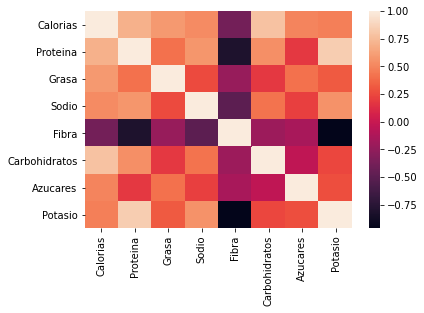

In [30]:
sns.heatmap(corre)

<AxesSubplot:>

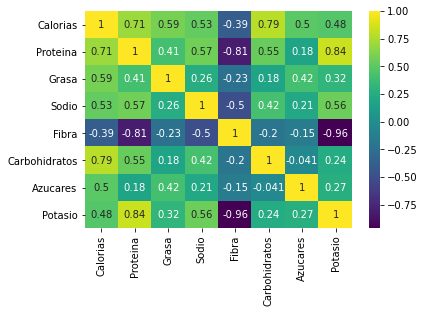

In [33]:
sns.heatmap(corre, annot=True,cmap='viridis')

# Diagramas de dispersión
El diagrama de dispersión sirve para visualizar relaciones entre un par de variables cuantitativas.



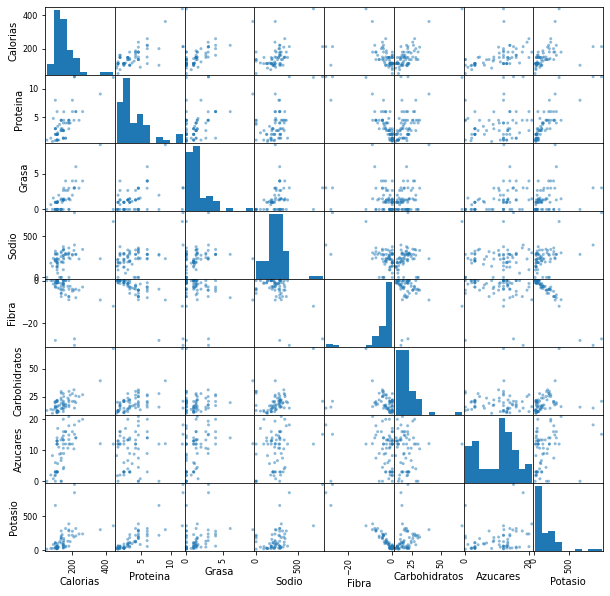

In [32]:
pd.plotting.scatter_matrix(cuanti,  figsize=(10, 10))
plt.show()

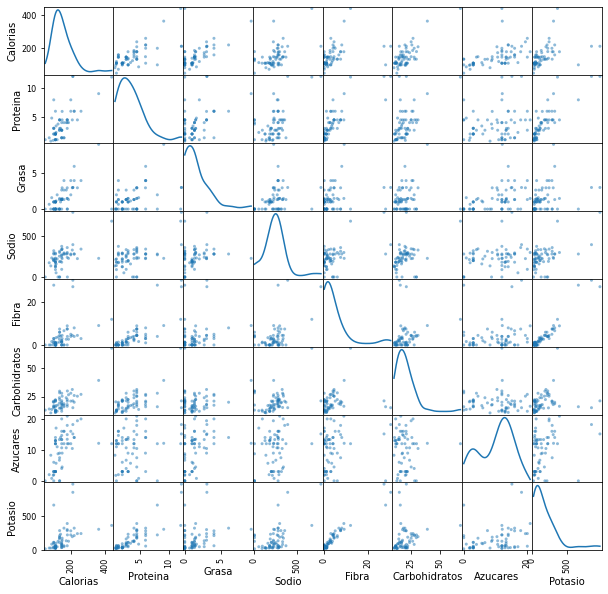

In [18]:
pd.plotting.scatter_matrix(cuanti,  figsize=(10, 10), diagonal="kde")
plt.show()


# Tablas de contingencia

Una tabla de contingencia contiene los conteos de una o más variables cualitativas.

In [19]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber1.csv"
datos1=pd.read_csv(url, sep=";", encoding="latin1")
datos1.shape

/home/isaac/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (9,57,69) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(10000, 78)

In [20]:
datos1.shape
tabla=pd.crosstab(datos1.FAMI_CUARTOSHOGAR, datos1.FAMI_NIVEL_SISBEN)
print(tabla)

FAMI_NIVEL_SISBEN  Esta clasificada en otro nivel del SISBEN  Estrato 1  \
FAMI_CUARTOSHOGAR                                                         
Cinco                                                      3          0   
Cuatro                                                    13          0   
Diez o m s                                                 0          0   
Dos                                                       35          0   
Nueve                                                      0          0   
Ocho                                                       0          0   
Seis                                                       0          0   
Siete                                                      0          0   
Tres                                                      47          0   
Una                                                        0          1   
Uno                                                        8          0   

FAMI_NIVEL_SISBEN  Nivel

In [ ]:
sns.heatmap(tabla)

# Otros gráficos multivariados


In [ ]:
tabla=datos1.groupby(["FAMI_CUARTOSHOGAR", "FAMI_NIVEL_SISBEN"]).size()
print(tabla)

In [ ]:
tabla=datos1.groupby(["FAMI_CUARTOSHOGAR", "FAMI_NIVEL_SISBEN"]).size()
tabla=tabla.reset_index(name="Conteo")
print(tabla)

In [ ]:
fig = px.bar(tabla, x="FAMI_CUARTOSHOGAR", y="Conteo", color="FAMI_NIVEL_SISBEN")
fig.show()

In [ ]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber1.csv"
datos1=pd.read_csv(url, sep=";", encoding="latin1")
for i in range(11):
 j=i+2
 x=["https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber",j, ".csv"]
 x[1]=str(x[1])
 url="".join(x)
 print(url)
 datosd=pd.read_csv(url, sep=";", encoding="latin1")
 datos1=pd.concat([datos1, datosd])



In [ ]:
corre=datos1.corr()
sns.heatmap(corre)

In [ ]:
tabla=datos1.groupby(["FAMI_CUARTOSHOGAR", "FAMI_NIVEL_SISBEN"]).size()
tabla=tabla.reset_index(name="Conteo")
fig = px.bar(tabla, x="FAMI_CUARTOSHOGAR", y="Conteo", color="FAMI_NIVEL_SISBEN")
fig.show()

In [ ]:
fig = px.scatter(datos1, x="MOD_RAZONA_CUANTITAT_PUNT", 
                 y="MOD_LECTURA_CRITICA_PUNT")
fig.show()

In [ ]:
tabla=datos1.groupby([datos1.ESTU_GENERO, datos1.ESTU_INST_DEPARTAMENTO]).mean()
tabla=tabla.reset_index()
print(tabla)

In [ ]:
fig = px.scatter(tabla, x="MOD_RAZONA_CUANTITAT_PUNT", 
                 y="MOD_LECTURA_CRITICA_PUNT", color="ESTU_GENERO")
fig.show()

In [ ]:
tabla1=datos1.groupby([datos1.ESTU_GENERO, datos1.ESTU_INST_DEPARTAMENTO]).size()
tabla1=tabla1.reset_index(name="Conteo")
tabla["Conteo"]=tabla1.Conteo
fig = px.scatter(tabla, x="MOD_RAZONA_CUANTITAT_PUNT", 
                 y="MOD_LECTURA_CRITICA_PUNT", color="ESTU_GENERO", size="Conteo", hover_name="ESTU_INST_DEPARTAMENTO")
fig.show()

In [ ]:
fig = px.density_contour(datos1, x=datos1.MOD_LECTURA_CRITICA_PUNT,
                         y=datos1.MOD_RAZONA_CUANTITAT_PUNT)
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [ ]:
fig = px.density_contour(datos1,x=datos1.MOD_RAZONA_CUANTITAT_PUNT,
                         y=datos1.MOD_COMPETEN_CIUDADA_PUNT)
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [ ]:
df = px.data.wind()
fig = px.bar_polar(tabla, r=tabla.MOD_COMUNI_ESCRITA_PUNT, theta=tabla.ESTU_INST_DEPARTAMENTO,
                   color=tabla.ESTU_GENERO, template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [ ]:
tabla2=tabla[tabla["Conteo"]>2]
fig = px.bar_polar(tabla2, r=tabla.MOD_COMUNI_ESCRITA_PUNT, theta=tabla.ESTU_INST_DEPARTAMENTO,
                   color=tabla.ESTU_GENERO, template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

Sí desea mas información de gráficos con [plotly](https://plotly.com/python/)


Vamos a ejecutar instrucciones del software [R](https://www.r-project.org/) a traves del paquete [rpy2](https://rpy2.readthedocs.io/en/latest/overview.html) en Python.
 Iniciaremos importando el paquete en python.

 El codigo completo está en [R](https://github.com/Cruzalirio/Ucentral/blob/master/CodigosR/IntroduccionMultivariado.R)

In [ ]:
import rpy2
%load_ext rpy2.ipython

In [ ]:
%%R
Datos=read.csv2("/content/Cereal.csv")

str(Datos)


cuanti=subset(Datos, select=c(3:10))
### Matriz de covarianzas

cov(cuanti)


cor(cuanti)
library(reshape2)
library(ggplot2)
matriz=cor(cuanti)
matriz=melt(matriz)
ggplot(matriz,aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()

plot(cuanti)


p=ggplot(Datos, aes(x=Fibra, y=Potasio))
p+geom_point()+geom_smooth(method="lm")


p=ggplot(Datos, aes(x=Fibra, y=Potasio))
p+geom_point()+geom_smooth()


v <- ggplot(Datos, aes(Fibra, Potasio))
v + geom_density_2d()


### COntingencia

library(readxl)
Hepatitis=read_excel("/content/Hepatitis.xls")


cuali=subset(Hepatitis, select=-c(2,15:19))

str(cuali)
table(cuali$Sexo, cuali$Esteroides)

table(cuali$Sexo, cuali$Esteroides, cuali$Histologia)


ggplot(Hepatitis, aes(x=Sexo, fill=Esteroides))+geom_bar()

ggplot(Hepatitis, aes(x=Sexo, y=Albumina))+geom_boxplot()+facet_grid(.~Histologia)
ggplot(Hepatitis, aes(x=Albumina, fill=Sexo, alpha=0.5))+geom_density()+facet_grid(.~Histologia)
